# Xgboost实战
　　Xgboost有两大类接口：Xgboost原生接口 和sklearn接口，并且Xgboost能够实现分类回归两种任务。下面对这四种情况做以解析。
# https://www.cnblogs.com/wj-1314/p/9402324.html

# 1，基于Xgboost原生接口的分类

In [1]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 准确率
 
# 记载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
# 数据集分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123457)
 
# 算法参数
params = {
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':3,
    'gamma':0.1,
    'max_depth':6,
    'lambda':2,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'slient':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
}
 
plst = params.items()
 
# 生成数据集格式
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 500
# xgboost模型训练
model = xgb.train(plst,dtrain,num_rounds)
 
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)
 
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('accuarcy:%.2f%%'%(accuracy*100))
 
# 显示重要特征
plot_importance(model)
plt.show()

accuarcy:93.33%


<Figure size 640x480 with 1 Axes>

# 2，基于Xgboost原生接口的回归

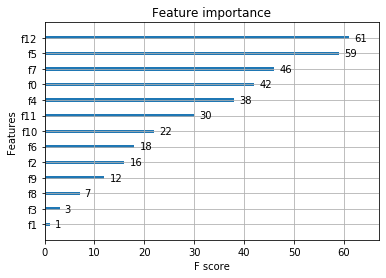

In [2]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
 
# 加载数据集,此数据集时做回归的
boston = load_boston()
X,y = boston.data,boston.target
 
# Xgboost训练过程
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
 
# 算法参数
params = {
    'booster':'gbtree',
    'objective':'reg:gamma',
    'gamma':0.1,
    'max_depth':5,
    'lambda':3,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'slient':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
}
 
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 300
plst = params.items()
model = xgb.train(plst,dtrain,num_rounds)
 
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
ans = model.predict(dtest)
 
# 显示重要特征
plot_importance(model)
plt.show()

# 3，Xgboost使用sklearn接口的分类（推荐）

In [4]:
from xgboost.sklearn import XGBClassifier
 
clf = XGBClassifier(
    silent=0,  # 设置成1则没有运行信息输出，最好是设置为0，是否在运行升级时打印消息
    # nthread = 4  # CPU 线程数 默认最大
    learning_rate=0.3 , # 如同学习率
    min_child_weight = 1,
    # 这个参数默认为1，是每个叶子里面h的和至少是多少，对正负样本不均衡时的0-1分类而言
    # 假设h在0.01附近，min_child_weight为1 意味着叶子节点中最少需要包含100个样本
    # 这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易过拟合
    max_depth=6, # 构建树的深度，越大越容易过拟合
    gamma = 0,# 树的叶子节点上做进一步分区所需的最小损失减少，越大越保守，一般0.1 0.2这样子
    subsample=1, # 随机采样训练样本，训练实例的子采样比
    max_delta_step=0,  # 最大增量步长，我们允许每个树的权重估计
    colsample_bytree=1, # 生成树时进行的列采样
    reg_lambda=1, #控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合
    # reg_alpha=0, # L1正则项参数
    # scale_pos_weight =1 # 如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛，平衡正负权重
    # objective = 'multi:softmax', # 多分类问题，指定学习任务和响应的学习目标
    # num_class = 10,  # 类别数，多分类与multisoftmax并用
    n_estimators=100,  # 树的个数
    seed = 1000,  # 随机种子
    # eval_metric ='auc'
)

# 基于Sckit-learn接口的分类

accuracy:93.33%


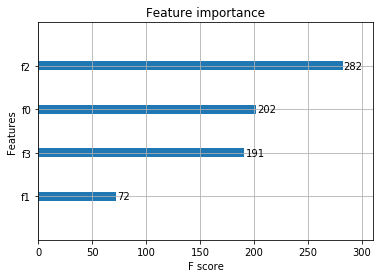

In [6]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
# 加载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12343)
 
# 训练模型
model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=160,silent=True,objective='multi:softmax')
model.fit(X_train,y_train)
 
# 对测试集进行预测
y_pred = model.predict(X_test)
 
#计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('accuracy:%2.2f%%'%(accuracy*100))
 
# 显示重要特征
plot_importance(model)
plt.show()


# 4，基于Scikit-learn接口的回归

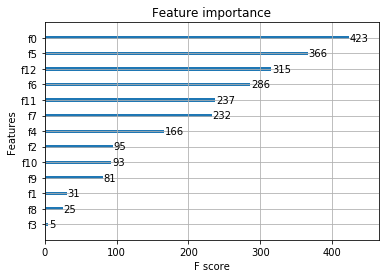

In [7]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
 
# 导入数据集
boston = load_boston()
X ,y = boston.data,boston.target
 
# Xgboost训练过程
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
 
model = xgb.XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=160,silent=True,objective='reg:gamma')
model.fit(X_train,y_train)
 
# 对测试集进行预测
ans = model.predict(X_test)
 
# 显示重要特征
plot_importance(model)
plt.show()

# 5，整理代码1（原生XGB）

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
import xgboost as xgb
#记录程序运行时间
import time
start_time = time.time()
X, y = make_hastie_10_2(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)##test_size测试集合所占比例
#xgb矩阵赋值
xgb_train = xgb.DMatrix(X_train, label=y_train)
xgb_test = xgb.DMatrix(X_test,label=y_test)
##参数
params={
'booster':'gbtree',
'silent':1 ,#设置成1则没有运行信息输出，最好是设置为0.
#'nthread':7,# cpu 线程数 默认最大
'eta': 0.007, # 如同学习率
'min_child_weight':3,
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
'max_depth':6, # 构建树的深度，越大越容易过拟合
'gamma':0.1,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
'subsample':0.7, # 随机采样训练样本
'colsample_bytree':0.7, # 生成树时进行的列采样
'lambda':2,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#'alpha':0, # L1 正则项参数
#'scale_pos_weight':1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。
#'objective': 'multi:softmax', #多分类的问题
#'num_class':10, # 类别数，多分类与 multisoftmax 并用
'seed':1000, #随机种子
#'eval_metric': 'auc'
}
plst = list(params.items())
num_rounds = 100 # 迭代次数
watchlist = [(xgb_train, 'train'),(xgb_test, 'val')]
  
#训练模型并保存
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(plst, xgb_train, num_rounds, watchlist,early_stopping_rounds=100)
#model.save_model('./model/xgb.model') # 用于存储训练出的模型
print ("best best_ntree_limit",model.best_ntree_limit)
y_pred = model.predict(xgb_test,ntree_limit=model.best_ntree_limit)
print ('error=%f' % (  sum(1 for i in range(len(y_pred)) if int(y_pred[i]>0.5)!=y_test[i]) /float(len(y_pred)))) 
#输出运行时长
cost_time = time.time()-start_time
print ("xgboost success!",'\n',"cost time:",cost_time,"(s)......")

[0]	train-rmse:1.12759	val-rmse:1.11303
Multiple eval metrics have been passed: 'val-rmse' will be used for early stopping.

Will train until val-rmse hasn't improved in 100 rounds.
[1]	train-rmse:1.12472	val-rmse:1.11038
[2]	train-rmse:1.1218	val-rmse:1.10781
[3]	train-rmse:1.11901	val-rmse:1.10531
[4]	train-rmse:1.11617	val-rmse:1.10276
[5]	train-rmse:1.11327	val-rmse:1.10024
[6]	train-rmse:1.11047	val-rmse:1.09775
[7]	train-rmse:1.10764	val-rmse:1.09517
[8]	train-rmse:1.10491	val-rmse:1.09276
[9]	train-rmse:1.10211	val-rmse:1.09033
[10]	train-rmse:1.09945	val-rmse:1.08795
[11]	train-rmse:1.09673	val-rmse:1.08549
[12]	train-rmse:1.0941	val-rmse:1.0832
[13]	train-rmse:1.09147	val-rmse:1.0809
[14]	train-rmse:1.08883	val-rmse:1.07857
[15]	train-rmse:1.08626	val-rmse:1.0763
[16]	train-rmse:1.08368	val-rmse:1.07402
[17]	train-rmse:1.08102	val-rmse:1.07165
[18]	train-rmse:1.07842	val-rmse:1.06935
[19]	train-rmse:1.07591	val-rmse:1.0671
[20]	train-rmse:1.07349	val-rmse:1.06495
[21]	train-rm

# 6，整理代码2（XGB使用sklearn

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  sklearn.datasets  import  make_hastie_10_2
from xgboost.sklearn import XGBClassifier
X, y = make_hastie_10_2(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)##test_size测试集合所占比例
clf = XGBClassifier(
silent=0 ,#设置成1则没有运行信息输出，最好是设置为0.是否在运行升级时打印消息。
#nthread=4,# cpu 线程数 默认最大
learning_rate= 0.3, # 如同学习率
min_child_weight=1,
# 这个参数默认是 1，是每个叶子里面 h 的和至少是多少，对正负样本不均衡时的 0-1 分类而言
#，假设 h 在 0.01 附近，min_child_weight 为 1 意味着叶子节点中最少需要包含 100 个样本。
#这个参数非常影响结果，控制叶子节点中二阶导的和的最小值，该参数值越小，越容易 overfitting。
max_depth=6, # 构建树的深度，越大越容易过拟合
gamma=0,  # 树的叶子节点上作进一步分区所需的最小损失减少,越大越保守，一般0.1、0.2这样子。
subsample=1, # 随机采样训练样本 训练实例的子采样比
max_delta_step=0,#最大增量步长，我们允许每个树的权重估计。
colsample_bytree=1, # 生成树时进行的列采样
reg_lambda=1,  # 控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
#reg_alpha=0, # L1 正则项参数
#scale_pos_weight=1, #如果取值大于0的话，在类别样本不平衡的情况下有助于快速收敛。平衡正负权重
#objective= 'multi:softmax', #多分类的问题 指定学习任务和相应的学习目标
#num_class=10, # 类别数，多分类与 multisoftmax 并用
n_estimators=100, #树的个数
seed=1000 #随机种子
#eval_metric= 'auc'
)
clf.fit(X_train,y_train,eval_metric='auc')
#设置验证集合 verbose=False不打印过程
clf.fit(X_train, y_train,eval_set=[(X_train, y_train)],eval_metric='auc',verbose=False)
#获取验证集合结果
evals_result = clf.evals_result()
y_true, y_pred = y_test, clf.predict(X_test)
print("Accuracy : %.4g" % metrics.accuracy_score(y_true, y_pred))
#回归
#m_regress = xgb.XGBRegressor(n_estimators=1000,seed=0)

Accuracy : 0.9177


In [17]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [18]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [22]:
from sklearn import svm,datasets
from sklearn.model_selection import train_test_split, GridSearchCV
gsearch1 = GridSearchCV(
estimator = XGBClassifier(learning_rate =0.1,n_estimators=140, max_depth=5,min_child_weight=1,gamma=0,
subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27),
param_grid = param_test1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

NameError: name 'train' is not defined